In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import os
import numpy as np

import matplotlib as mpl

mpl.rcParams.update({"figure.facecolor": "white"})

In [2]:
load_dir = r'C:\Users\Grant\OneDrive - UCB-O365\ARSENL\Experiments\SPCM\evaluation_loss'
df_dtime = pd.read_csv(load_dir + r'/eval_loss_dtimeTrue_Rho1.0E+06-1.0E+10_order8-19_shots1.00E+05_best_fit.csv')
df_pois = pd.read_csv(load_dir + r'/eval_loss_dtimeFalse_Rho1.0E+06-1.0E+10_order8-19_shots1.00E+05_best_fit.csv')

# eval_loss_dtime = df_dtime['Evaluation Loss'].dropna()
# eval_loss_pois = df_pois['Evaluation Loss'].dropna()
# percent_active = df_dtime['Average %-age where Detector was Active'].dropna()
# optimal_C = df_dtime['Optimal Scaling Factor'].dropna()
# if use_sim_data:
#     rho = df_dtime['Rho']
# else:
#     OD = df_dtime['OD'][:-1]
#     transmit_factor = 10**(-OD)
#     eval_loss_dtime = eval_loss_dtime[:-1]
#     eval_loss_pois = eval_loss_pois[:-1]
#     percent_active = percent_active[:-1]

# # OD_C = df_dtime['Hypothetical Scaling Factor'][:-1]

In [3]:
df_dtime

,Unnamed: 0,time vector,Rho100000000.0,Rho10000000000.0,Rho1200000000.0,Rho13000000.0,Rho150000000.0,Rho1700000000.0,Rho18000000.0,Rho210000000.0,...,Rho300000000.0,Rho3500000000.0,Rho36000000.0,Rho420000000.0,Rho5000000000.0,Rho51000000.0,Rho600000000.0,Rho7000000000.0,Rho73000000.0,Rho850000000.0
0,0,2.800000e-08,0.212221,77.228801,28.520637,8.981154,1.824604e+00,10.899986,3.166104,43.450187,...,10.905001,2.864679,3.866344,33.976196,23.118993,31.061248,88.872106,37.345955,29.636066,86.342090
1,1,2.802500e-08,0.230187,94.466098,33.121175,8.977989,1.973336e+00,12.636073,3.871290,49.359452,...,12.122574,3.525302,4.171651,38.418745,28.567434,34.873586,102.815550,45.855948,33.235011,100.562219
2,2,2.805000e-08,0.252329,115.796116,38.593782,9.033083,2.149222e+00,14.725789,4.760877,56.185608,...,13.541498,4.361853,4.520927,43.579023,35.387683,39.229317,119.152584,56.439977,37.346459,117.327148
3,3,2.807500e-08,0.279508,142.230698,45.118892,9.148265,2.357089e+00,17.249452,5.885668,64.082604,...,15.199016,5.425157,4.921009,49.585737,43.940078,44.212721,138.318369,69.626179,42.050206,137.117345
4,4,2.810000e-08,0.312825,175.038561,52.916642,9.326437,2.602842e+00,20.307176,7.310674,73.231727,...,17.140067,6.781569,5.379982,56.592495,54.682235,49.921948,160.830373,86.081152,47.439289,160.507384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,236,3.390000e-08,0.053678,0.014121,0.032145,0.030770,3.242810e+00,0.016941,0.269595,0.013379,...,0.015383,0.010413,0.035527,0.034050,0.015491,0.012704,0.014098,0.012069,0.012924,0.014316
237,237,3.392500e-08,0.015147,0.011623,0.013632,0.011690,3.473690e-01,0.010927,0.038762,0.005574,...,0.008682,0.007720,0.009454,0.013341,0.012707,0.005390,0.005943,0.010185,0.005530,0.006047
238,238,3.395000e-08,0.003515,0.009848,0.005586,0.003815,1.540373e-02,0.007486,0.003536,0.002245,...,0.005024,0.006202,0.002192,0.004959,0.010733,0.002210,0.002431,0.008897,0.002289,0.002480
239,239,3.397500e-08,0.000650,0.008609,0.002208,0.001041,2.310982e-04,0.005503,0.000187,0.000873,...,0.002998,0.005463,0.000438,0.001743,0.009354,0.000875,0.000964,0.008067,0.000915,0.000986


In [4]:
rho_lst = []
col_lst = []
for col in df_dtime:
    col_lst.append(col)
    rho_lst.append(col[3:])

rho_lst = np.array(rho_lst[2:]).astype(float)

In [5]:
t = df_dtime['time vector']

In [56]:
rmse_dtime_lst = np.zeros(len(rho_lst))
rmse_pois_lst = np.zeros(len(rho_lst))
rrmse_dtime_lst = np.zeros(len(rho_lst))
rrmse_pois_lst = np.zeros(len(rho_lst))
true_rho_lst = []
fit_rate_seg_dtime_lst = []
fit_rate_seg_pois_lst = []
for i in range(len(rho_lst)):
    A = rho_lst[i]
    mu = 31.2e-9  # [s]
    sig = 500e-12  # [s]
    bg = 1e4  # [Hz]

    true_rho = A * np.exp(-1 * (t - mu) ** 2 / 2 / sig ** 2) + bg
    true_rho_lst.append(true_rho)
    
    fit_rate_seg_dtime = df_dtime[col_lst[i+2]]
    fit_rate_seg_pois = df_pois[col_lst[i+2]]
    fit_rate_seg_dtime_lst.append(fit_rate_seg_dtime)
    fit_rate_seg_pois_lst.append(fit_rate_seg_pois)
    
    rmse_dtime = np.sqrt(np.sum(((fit_rate_seg_dtime-true_rho))**2)/len(fit_rate_seg_dtime))
    rmse_dtime_lst[i] = rmse_dtime
    
    rrmse_dtime = np.sqrt(np.sum(((fit_rate_seg_dtime-true_rho)/true_rho)**2)/len(fit_rate_seg_dtime))
    rrmse_dtime_lst[i] = rrmse_dtime
    
    rmse_pois = np.sqrt(np.sum(((fit_rate_seg_pois-true_rho))**2)/len(fit_rate_seg_pois))
    rmse_pois_lst[i] = rmse_pois
    
    rrmse_pois = np.sqrt(np.sum(((fit_rate_seg_pois-true_rho)/true_rho)**2)/len(fit_rate_seg_pois))
    rrmse_pois_lst[i] = rrmse_pois



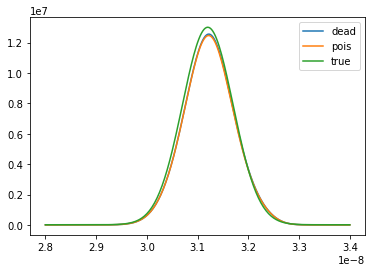

In [57]:
idx = 3

plt.plot(t, fit_rate_seg_dtime_lst[idx], label='dead')
plt.plot(t, fit_rate_seg_pois_lst[idx], label='pois')
plt.plot(t, true_rho_lst[idx], label='true')
plt.legend()
plt.show()

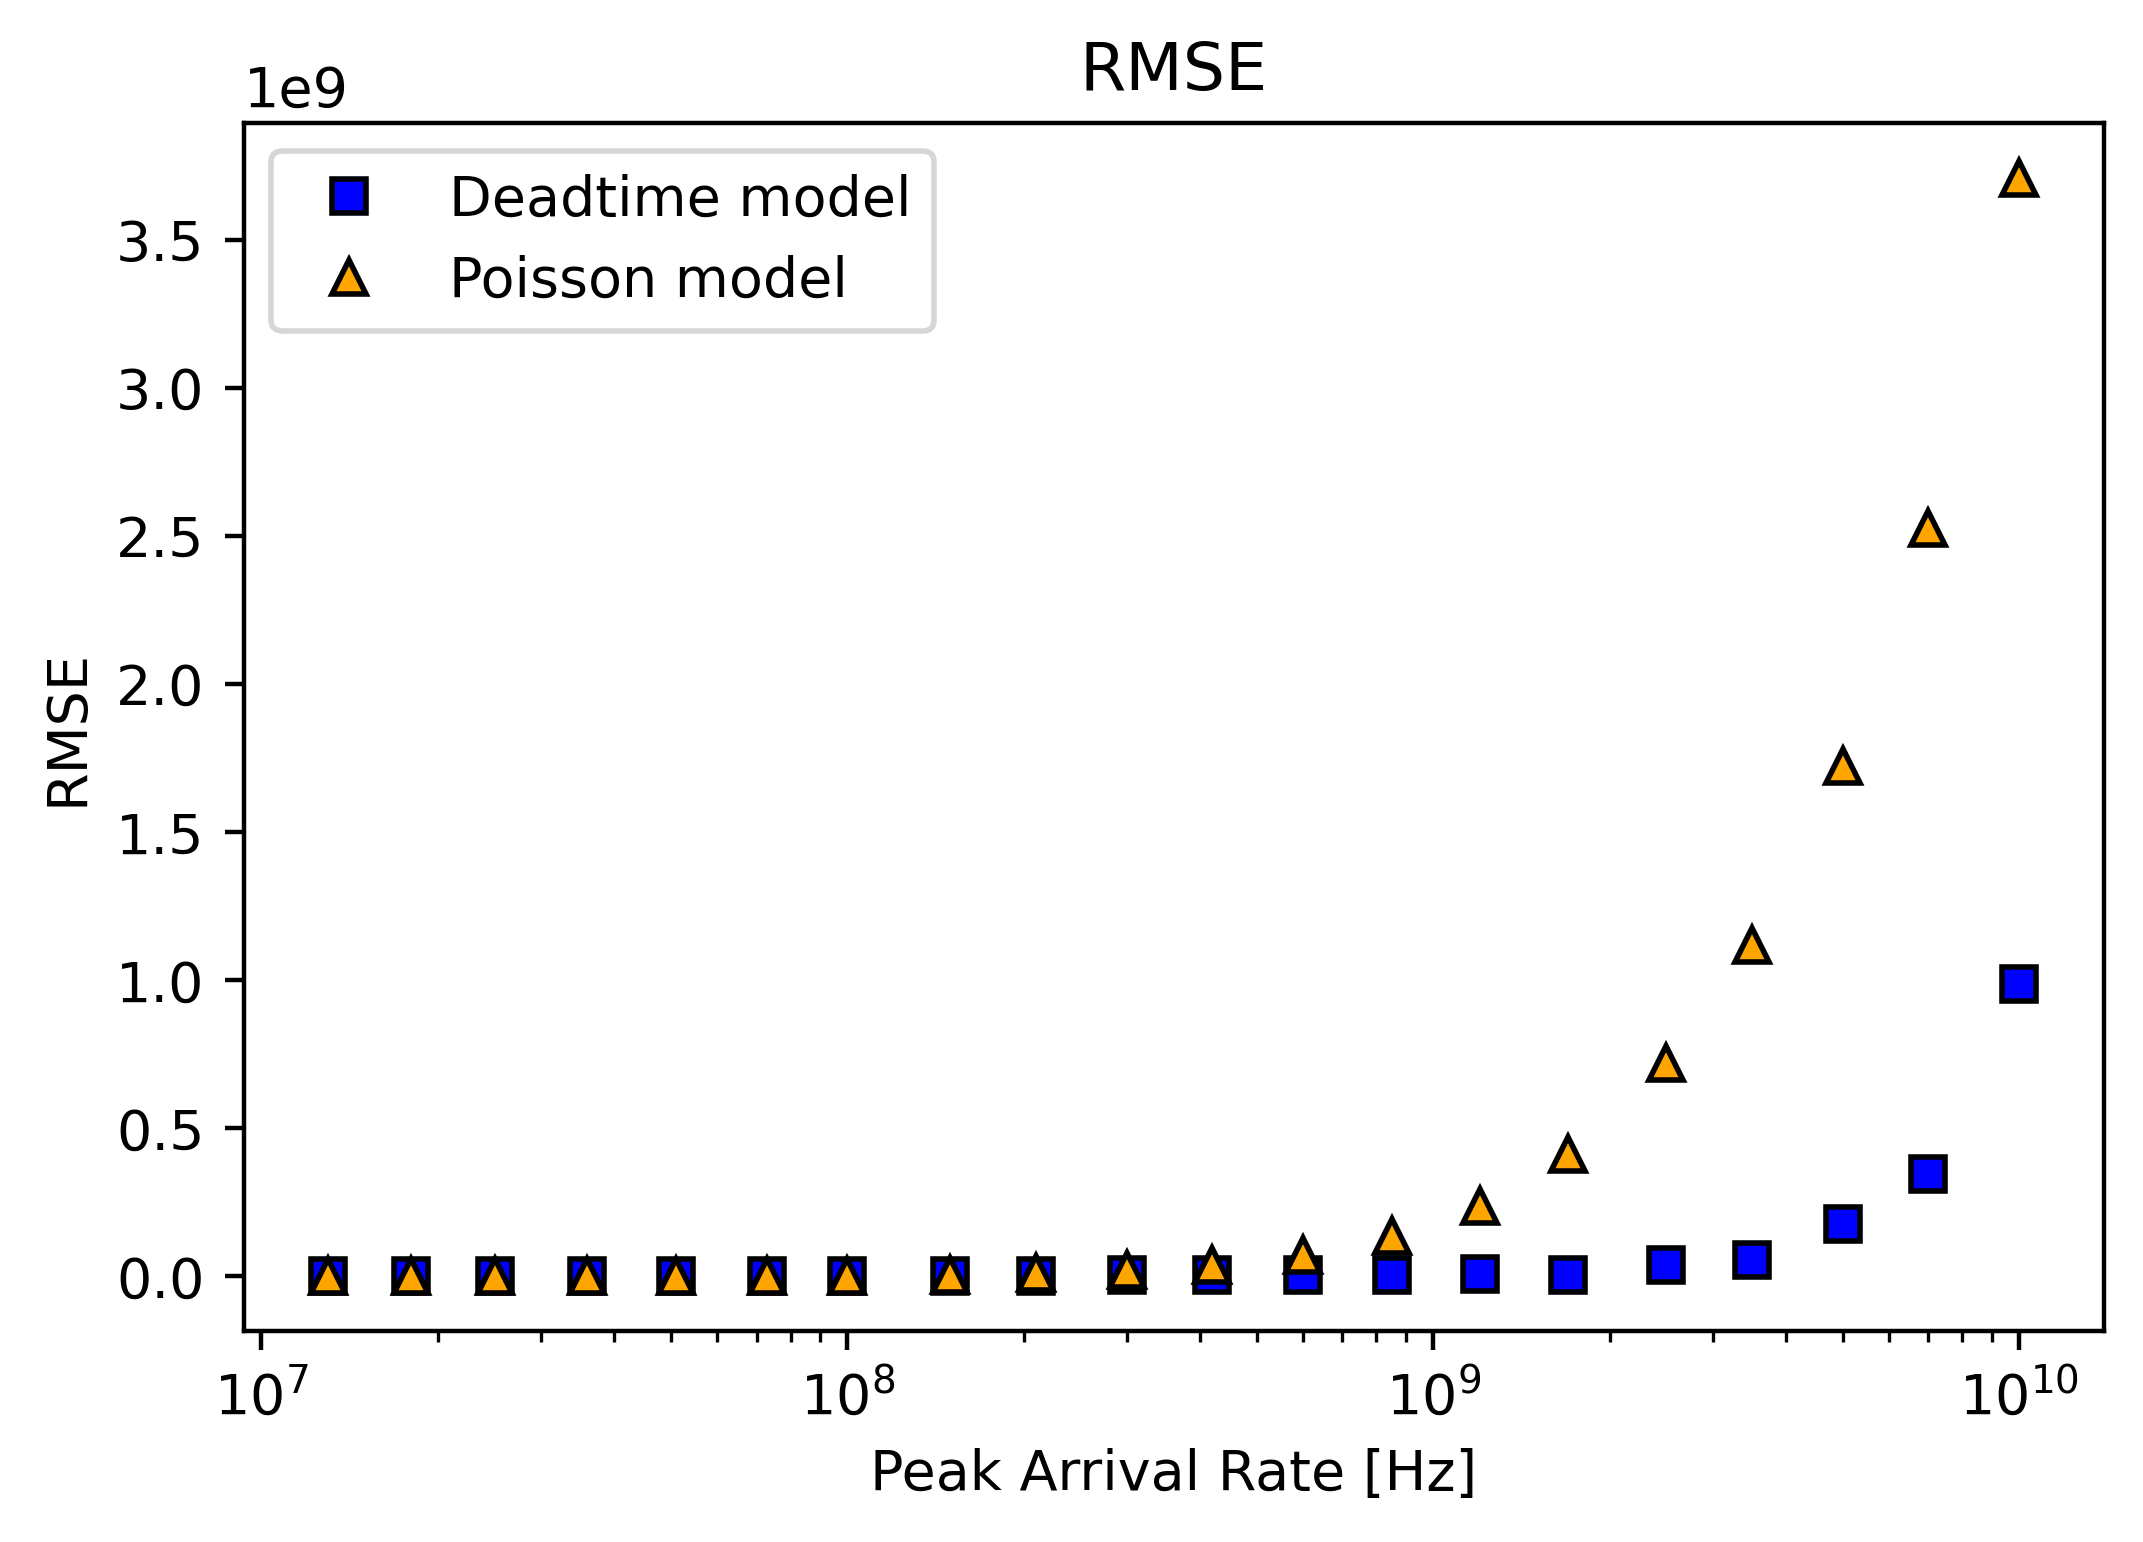

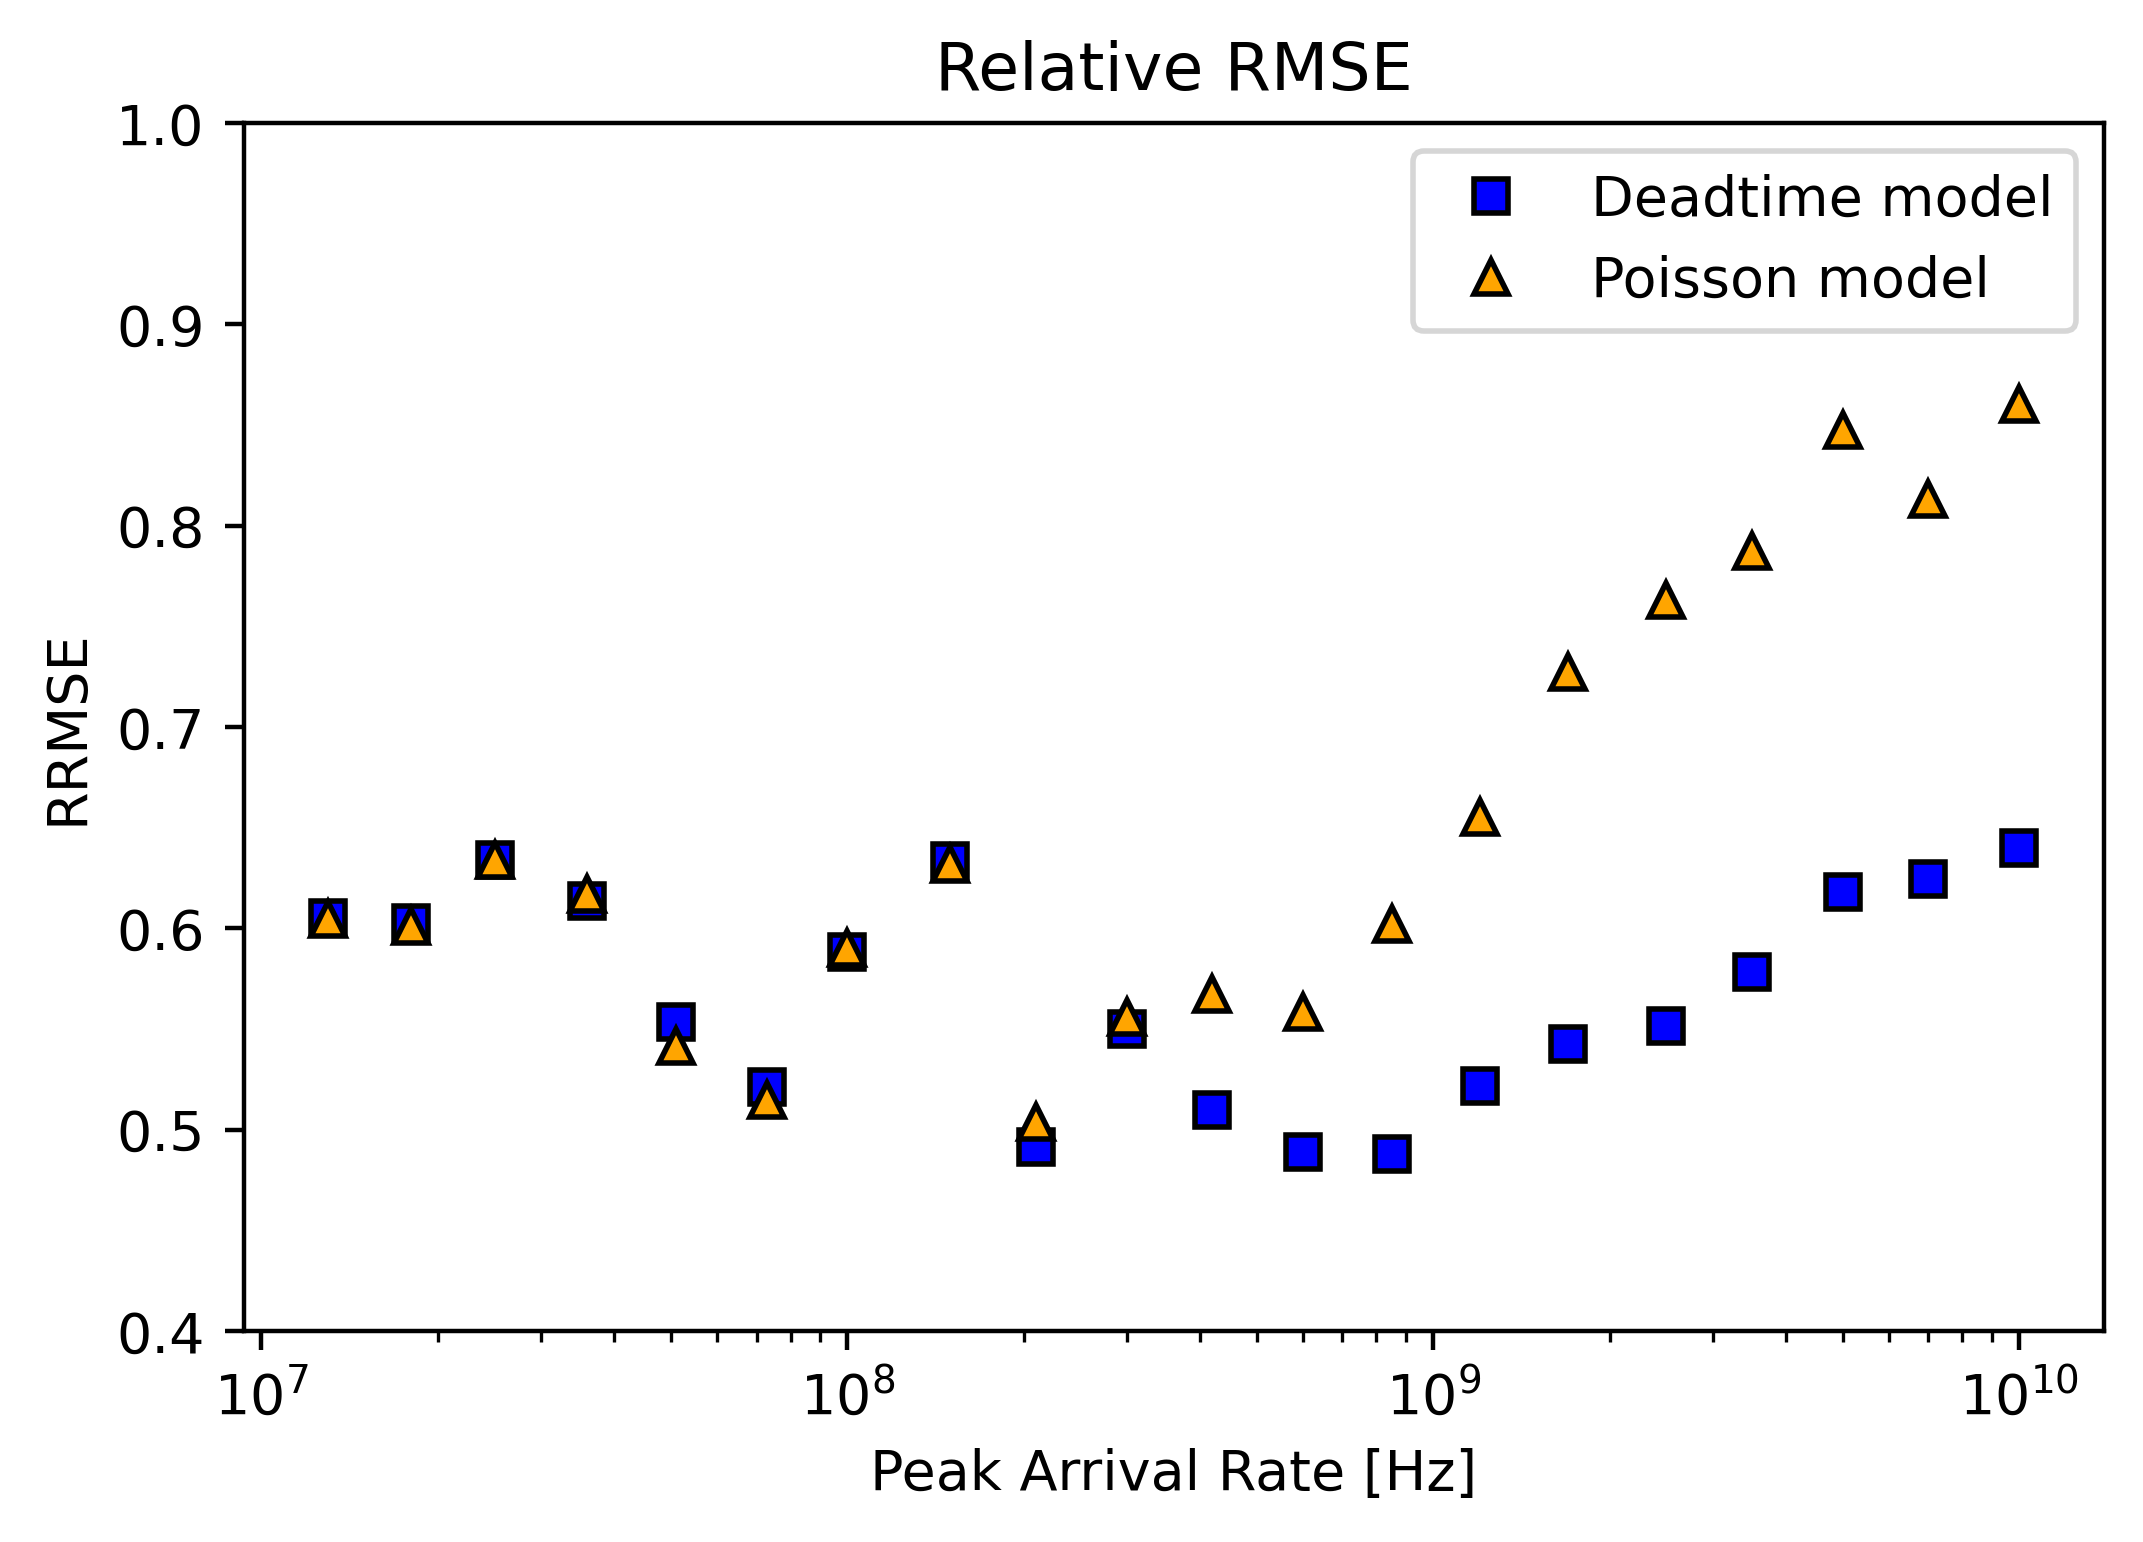

In [61]:
fig = plt.figure(dpi=400)
ax = fig.add_subplot(111)
ax.semilogx(rho_lst, rmse_dtime_lst, 's', color='blue', markeredgecolor='black', label='Deadtime model')
ax.semilogx(rho_lst, rmse_pois_lst, '^', color='orange', markeredgecolor='black', label='Poisson model')
ax.set_ylabel('RMSE')
ax.set_xlabel('Peak Arrival Rate [Hz]')
ax.set_title('RMSE')
plt.legend()
plt.show()

fig = plt.figure(dpi=400)
ax = fig.add_subplot(111)
ax.semilogx(rho_lst, rrmse_dtime_lst, 's', color='blue', markeredgecolor='black', label='Deadtime model')
ax.semilogx(rho_lst, rrmse_pois_lst, '^', color='orange', markeredgecolor='black', label='Poisson model')
ax.set_ylabel('RRMSE')
ax.set_xlabel('Peak Arrival Rate [Hz]')
ax.set_title('Relative RMSE')
ax.set_ylim([0.4, 1.0])
plt.legend()
plt.show()